## Problem Statement
Office Supply Co. has noticed an increased rate of complaints with their printers. Customers have been noting that the
printers are failing to print earlier in their life cycles. Office Supply Co. needs you to investigate the observations coming.

from the field and provide any insights that could help mitigate the potential issue.
Specifically, the Office Supply Co. executive team wants to know:

- Whether there are common characteristics among the printers associated with the complaints
- Forecast, if possible, the number of printer failures over the next year
- Any other insights or action items that you may have
- Additionally, there are 1000 units of printers from each brand currently in stock. If Office Supply Co. were to ship
out all remaining stock today, what will the number of printer failures over the next year look like?

## Data description
Below, you will find a brief description of the dataset included in this exercise:
printer_usage_data.csv – Provides a list of printers and their usage patterns
- office_id: Unique Identifier of the office that owns the printer
- serial: Unique Identifier of a given printer
- total_activity: Count of papers that the printer has ever printed
- first_month: The month that the printer was first used.
- last_month: The month that the printer was last used.
- brand: Manufacturer of the printer
- office_average_monthly_activity: The monthly printing activity across all printers in an office.
- damaged: Variable indicating whether the printer was reported as damaged. True means the printer was
returned and diagnosed as damaged.

## Submission
- Assumptions: Relevant exploratory data analysis findings and assumptions
- Methodology: Explain which method(s) you chose to employ and why
- Recommendations: Any forecast and strategy recommendation that you may have

## Analysis and Findings

- The combindation of aggregation and forcasting was used for analysis
- Data was cleaned from very few duplicates, no null entry was found
- The dates are turn into time stamp and duration of activity of printer in terms of month and day was calculated
- Data set spans over two years from 2013 to 2017
- The supplier Co. initially in 2013 only shipped Kodak printer and 6 months later start adding the Brother brand, the HP printer was shipped (was first turned on) 1.5 years after Kodak.
- Before 2014-04 the fails from both Kodak and brother very almost negligable, considering the stable shipment of about 500 printer per month for both brand
- The Kodak fails after 2014 still stayed minimal, while the Brother brand fails increased slightly and reached to a stable 10 print per month fail until close to the end of study
- A visible issue started by introducing the HP printer in 2014-07, within two month shippment stayed within the range of both Kodak and Brother. But by 2014-08 the fails start showing an increase over Brother fails. At this stage, still the shipment of HP was not too large and within range of Brother brand.
- This increase in failure was not either noticed right away or was not taken seriously, and shipment of HP was rammped up to an staggering 2000 printers per month and stayed in that range for about 4 months. This is when that failures even starting coming significanly more and peaking at about 120 printer per month on 2015-01
- The shipment was finally reduced at about 2014-12 on ward, which was rather late action.
- The study of activities in the office and total prints per printer does not show any unusual behavior in terms of usage to trigger such fails. Serial number of fail/pass printers were also studied, no unusual pattern in Lot-to-Lot variation was observed.
- In terms of office id itself, there were more or less as many office as printer, but even offices with more printers did not show alarming failure rate that would indicate location dependency. 
- There is however a curious observation about time impact, since both brother and HP printers have an increase in fails. While HP showing more serious problem, it would be interesting to know whether or not HP/Brother used similar delivery mechanisms to customers or whether or not they share similar internal parts from same vendors. There might be an internal change in Brother after 2014, since the printer was generally ok before that. This should be investigated by talking to delivery team as well as HP and Brother representatives.
- There is also something unclear from the study: the definition of fail. Was the fail verdict independently verified by Supplier? Since there are some pass printers that were not used for some reason for long. Did this printer had issue from customer point of view but supplier did not call it fail since independently could not verify the fail?
- The time it takes for HP printer fail is on average 2 month, for Brother is 4 months and for Kodak is 11 months. Kodak is much more reliable when compared to other brand. But at the same time the time span of study is not that long to have more concrete information on Kodak later time in its life time.

## Questions
- ### Whether there are common characteristics among the printers associated with the complaints

Generally, the HP printers fails at around 8% and compared to brother brand with similar shipment the rate was about 1.4%. Kodak rate was at 0.1%. There was also element of time and big and sudden ramp of HP without performing a trial period that made the matter worse. No information on delivery or internal parts of printer but need to be further investigated that why brother also showed slight incease aroung mid 2014.
- ### Forecast, if possible, the number of printer failures over the next year

For the forcasting, the count of fails per month are studied. The problem with forcasting is sudden increase and ramp in shipment of HP as well as reduction of shipment (perhaps executive decision due to fails) few months later. Therefore, the data has externally influenced. A very rough approach is using the the data only before the shipment is reduced and predict few months leading to peak in fail up to 2015-01 but still the method is unable to go beyond that since suddenly shipement is reduced. The Holt approch does not consider any seasonality, and only take into account the pure trend (there is no seasonality is data). It can predict the last few months of fails up to 2015-01 before shipment is reduced.
- ### Any other insights or action items that you may have?

Do not ramp up a new feature, part, printer without trial period. Also watch data closely in the first few months. This was not done in this case and the ramp up was pretty aggressive. The total fails could have been lower if 2014-08 had a chat with HP at least that what might be the cause.
- ### Additionally, there are 1000 units of printers from each brand currently in stock. If Office Supply Co. were to ship out all remaining stock today, what will the number of printer failures over the next year look like?

To look at this data a stable period of shipment far from end of the study is considered (considering it takes 2/4/11 months it take for HP/Brother/Kodak to show fails). For Brother (2014-01 to 2014-05), for Kodak (2013-07 to 2014-05), and for HP (2014-09 to 2014-12). During this time, the period it takes for a printer to fail in form of 'month' is aggregated for fail heads. By doind that the failure rate per printer during a 1-12 month period calculated and multiplied by 1000 incoming printer for each Brand. This show HP printer show ~17 fails in the first month, ~15 fail in the second month and gradually fails reduced to zero after 10 months. Total account for 7-8 printers for HP, with more fails in the first 4 months.
- ### Additional study

The printers fail/pass is predicted using multiple classifer. Few categorical data (year/month ship time) as well as printer type are used. For numerical data months it take for the printer to fail, and usage data is used. Both categorical and numerical data were added into pipeline for more streamlined process. Since the fail to pass ratio is very small, fscore/recall/precision/auc score are more appropriate since they take into account the un-balance data. Ensemble models are considered with similar estimator (500). Between all the ensemble models, Gradient Boositing (GB) on test data did better, then Random Forest (RF), and finally ADA Boost. As expected RF shows overfitting on train data. Overall the F1score of best case (GB) on test data at most acheived 0.35. This is not a great number and we definitely need more information (feature) about construct of printer other than brand itself to be able to get to higher scores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score, auc, roc_auc_score , confusion_matrix, recall_score, precision_score

## Exploratory analysis and data cleaning

In [2]:
df = pd.read_csv('printer_usage_data.csv')
df.head()

,office_id,serial,total_activity,first_month,last_month,Brand,office_average_monthly_activity,damaged
0,1,S00107822035,2161,9/1/14,7/1/15,HP,756.36,False
1,1,H00584343751,888,8/1/14,2/1/15,HP,756.36,True
2,2,Y00259374339,14385,1/1/14,4/1/15,Kodak,1776.62,False
3,2,Y00143915036,9508,1/1/14,3/1/15,Kodak,1776.62,False
4,3,T00209648925,414,1/1/14,2/1/15,Brother,473.70,False


In [3]:
df.damaged.mean() * 100

3.78968029290756

In [4]:
df.shape

(26493, 8)

In [5]:
df.office_id.nunique()

23203

In [6]:
df.Brand.value_counts()

HP         10491
Brother     9744
Kodak       6258
Name: Brand, dtype: int64

In [7]:
df.serial.nunique()

26492

In [8]:
df.isnull().sum()

office_id                          0
serial                             0
total_activity                     0
first_month                        0
last_month                         0
Brand                              0
office_average_monthly_activity    0
damaged                            0
dtype: int64

In [9]:
df.groupby(by =['serial']).count().sort_values(by = ['office_id'], ascending = False).head(5) #Y01246081377

,office_id,total_activity,first_month,last_month,Brand,office_average_monthly_activity,damaged
serial,,,,,,,
Y01246081377,2,2,2,2,2,2,2
T00016489509,1,1,1,1,1,1,1
T00019043461,1,1,1,1,1,1,1
T00018881581,1,1,1,1,1,1,1
T00018615265,1,1,1,1,1,1,1


In [10]:
df[df.serial == 'Y01246081377']

,office_id,serial,total_activity,first_month,last_month,Brand,office_average_monthly_activity,damaged
15949,15159,Y01246081377,1663,3/1/14,3/1/15,Kodak,759.91,False
15950,15159,Y01246081377,1663,3/1/14,3/1/15,Kodak,759.91,False


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.groupby(by=['Brand'])['damaged'].agg(['count', 'mean'])

,count,mean
Brand,,
Brother,9744,0.014368
HP,10491,0.081594
Kodak,6257,0.001279


In [13]:
dg = df.groupby(by=['office_id'])['damaged'].agg(['count', 'mean'])
dg[(dg['count'] > 2) & (dg['mean'] != 0.0)].sort_values(by=['count'], ascending=False).head(10)

,count,mean
office_id,,
17059,53,0.132075
20526,39,0.051282
21892,32,0.281250
23659,18,0.111111
18677,16,0.062500
19083,16,0.187500
1251,14,0.214286
18546,13,0.307692
21883,11,0.363636


## Extracting time information

In [16]:
df['date_time_first'] = pd.to_datetime(df['first_month'])
df['date_time_last'] = pd.to_datetime(df['last_month'])

In [17]:
df['delta_time'] = df['date_time_last'] - df['date_time_first']

In [18]:
df.drop(['first_month', 'last_month'], axis=1, inplace=True)

In [19]:
df_date_brand = df.groupby(by=['date_time_first', 'Brand'])['damaged'].mean().reset_index()

In [20]:
df['delta_time_day_int'] = df['delta_time'].dt.days
df['delta_time_month_int'] = df['delta_time_day_int'].apply(lambda x: x // 30)

In [21]:
df_damaged = df[df['damaged'] == True][['office_id', 'serial', 'Brand', 'date_time_last']].copy()

In [22]:
df_damaged_delta_fail = df[df['damaged'] == True][['serial', 'Brand', 'delta_time_month_int']].copy()

## Printer life span per brand

*****HP
count    856.000000
mean       2.421729
std        2.318690
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: delta_time_month_int, dtype: float64

*****Brother
count    140.000000
mean       4.685714
std        3.987545
min        0.000000
25%        1.750000
50%        4.000000
75%        6.000000
max       21.000000
Name: delta_time_month_int, dtype: float64

*****Kodak
count     8.000000
mean     11.125000
std       7.845608
min       0.000000
25%       6.250000
50%      11.500000
75%      17.500000
max      21.000000
Name: delta_time_month_int, dtype: float64


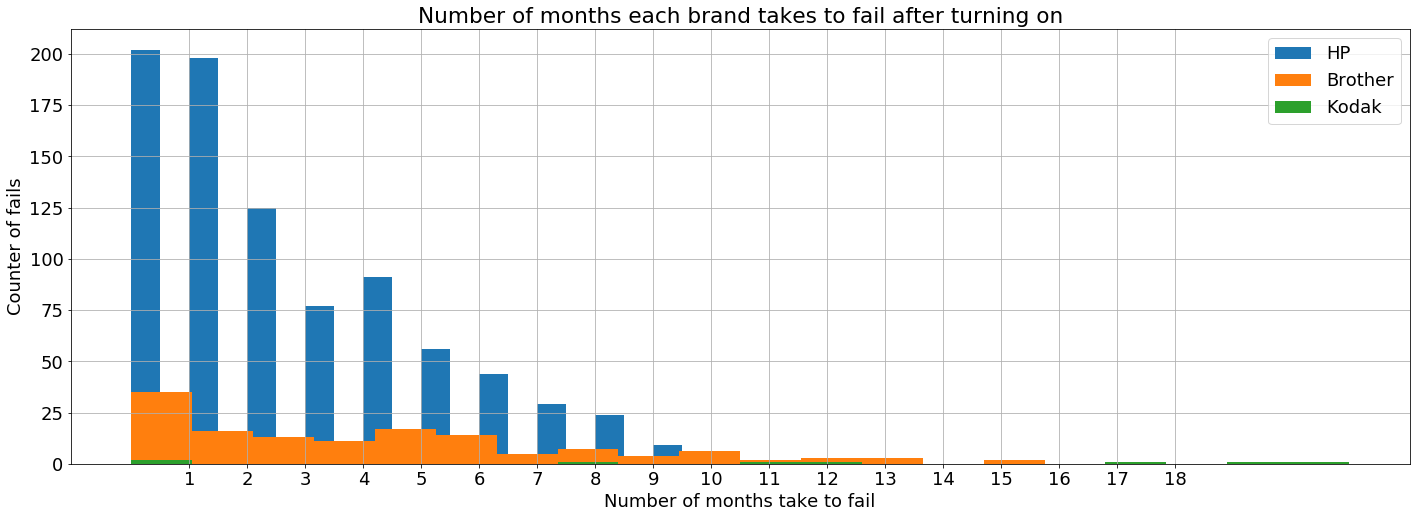

In [23]:
plt.rcParams.update({'font.size': 18, 'lines.linewidth': 2.0})
plt.figure(figsize=(24,8))
plt.hist(df_damaged_delta_fail[df_damaged_delta_fail['Brand'] == 'HP']['delta_time_month_int'], label='HP', bins=20)
plt.hist(df_damaged_delta_fail[df_damaged_delta_fail['Brand'] == 'Brother']['delta_time_month_int'], label='Brother', bins=20)
plt.hist(df_damaged_delta_fail[df_damaged_delta_fail['Brand'] == 'Kodak']['delta_time_month_int'], label='Kodak', bins=20)
plt.legend()
plt.xticks(np.arange(1, 19, 1))
plt.xlabel('Number of months take to fail')
plt.ylabel('Counter of fails')
plt.title('Number of months each brand takes to fail after turning on')
plt.grid()
print('*****HP')
print(df_damaged_delta_fail[df_damaged_delta_fail['Brand'] == 'HP']['delta_time_month_int'].describe())
print('')
print('*****Brother')
print(df_damaged_delta_fail[df_damaged_delta_fail['Brand'] == 'Brother']['delta_time_month_int'].describe())
print('')
print('*****Kodak')
print(df_damaged_delta_fail[df_damaged_delta_fail['Brand'] == 'Kodak']['delta_time_month_int'].describe())

In [24]:
df_damaged_all_agg = df_damaged.groupby(by=['date_time_last', 'Brand']).count().reset_index()[['date_time_last', 'office_id', 'Brand']].rename(columns = {'office_id': 'fail_counts'})

In [25]:
df_damaged_all_agg = df_damaged_all_agg.sort_values(by=['Brand','date_time_last','fail_counts'])

In [26]:
df.head()

,office_id,serial,total_activity,Brand,office_average_monthly_activity,damaged,date_time_first,date_time_last,delta_time,delta_time_day_int,delta_time_month_int
0,1,S00107822035,2161,HP,756.36,False,2014-09-01,2015-07-01,303 days,303,10
1,1,H00584343751,888,HP,756.36,True,2014-08-01,2015-02-01,184 days,184,6
2,2,Y00259374339,14385,Kodak,1776.62,False,2014-01-01,2015-04-01,455 days,455,15
3,2,Y00143915036,9508,Kodak,1776.62,False,2014-01-01,2015-03-01,424 days,424,14
4,3,T00209648925,414,Brother,473.70,False,2014-01-01,2015-02-01,396 days,396,13


In [27]:
df_all_activity = df.groupby(by=['date_time_first','Brand']).mean().\
                sort_values(by=['Brand','date_time_first']).\
                reset_index()[['date_time_first', 'Brand', 'total_activity', 'office_average_monthly_activity']].\
                rename(columns = {'office_id': 'shipping_counts'}).copy()

In [28]:
df_fail_activity = df[df['damaged'] ==True].groupby(by=['date_time_first','Brand']).mean().\
                sort_values(by=['Brand','date_time_first']).\
                reset_index()[['date_time_first', 'Brand', 'total_activity', 'office_average_monthly_activity']].\
                rename(columns = {'office_id': 'shipping_counts'}).copy()

## Printer and office activity per brand

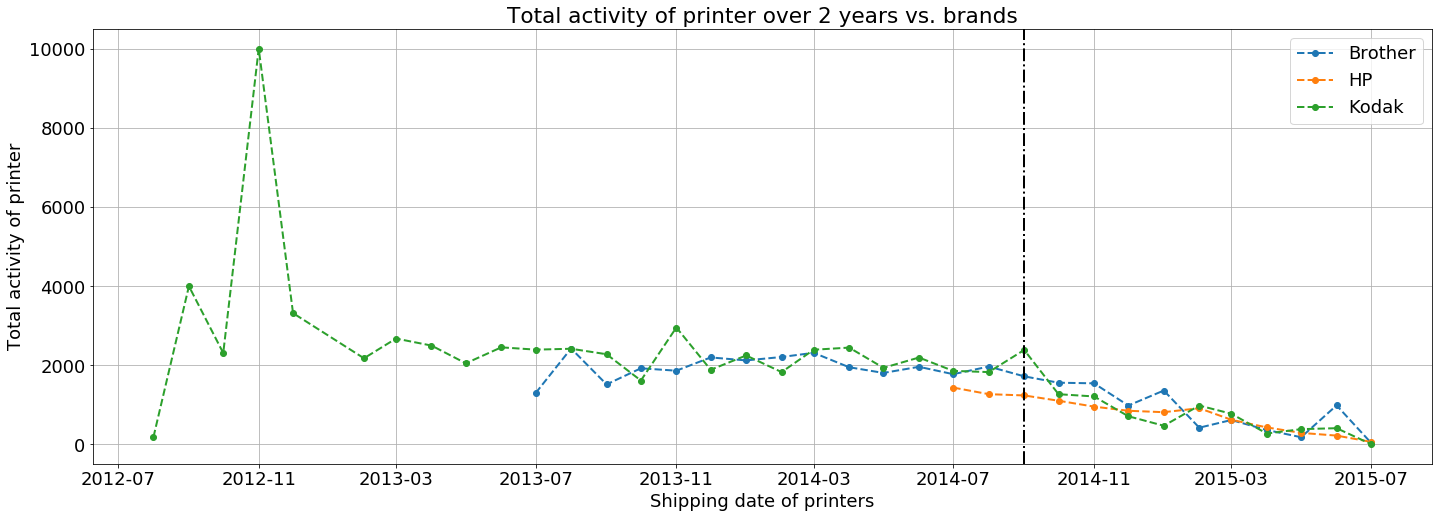

In [29]:
plt.figure(figsize=(24,8))
plt.plot_date(df_all_activity[df_all_activity['Brand'] == 'Brother']['date_time_first'],\
              df_all_activity[df_all_activity['Brand'] == 'Brother']['total_activity'], linestyle='--', label='Brother')
plt.plot_date(df_all_activity[df_all_activity['Brand'] == 'HP']['date_time_first'],\
              df_all_activity[df_all_activity['Brand'] == 'HP']['total_activity'],  linestyle='--',label='HP')
plt.plot_date(df_all_activity[df_all_activity['Brand'] == 'Kodak']['date_time_first'],\
              df_all_activity[df_all_activity['Brand'] == 'Kodak']['total_activity'],  linestyle='--',label='Kodak')
plt.legend()
plt.xlabel('Shipping date of printers')
plt.ylabel('Total activity of printer')
plt.title('Total activity of printer over 2 years vs. brands')
plt.grid()
plt.axvline('2014-09-01', linestyle='-.', color='black')


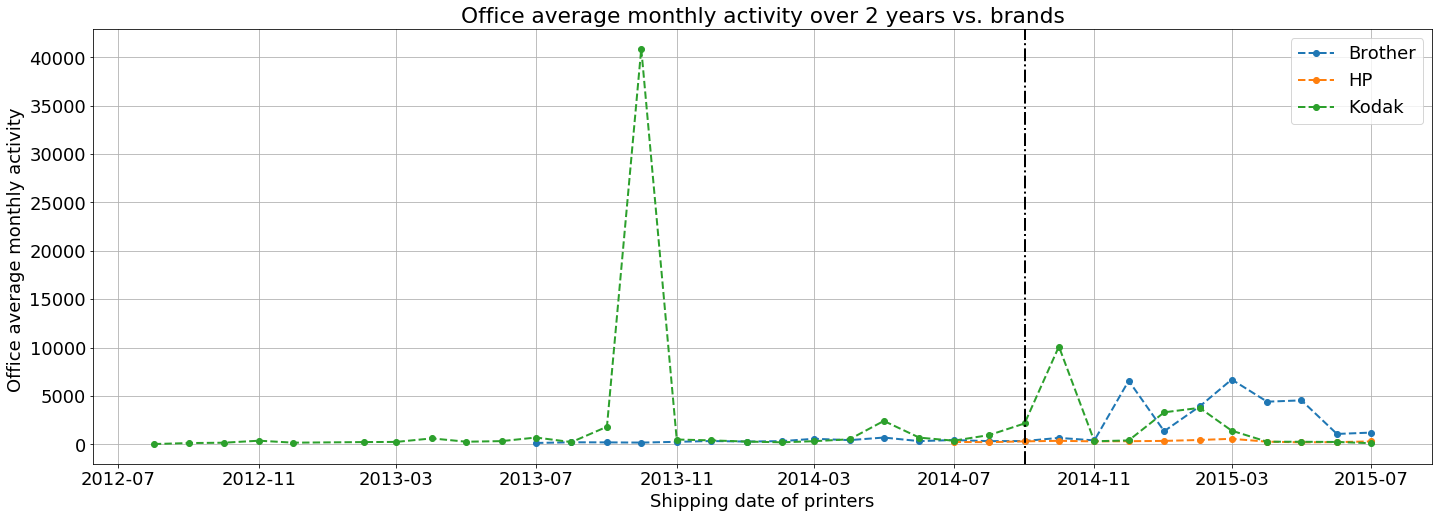

In [30]:
plt.figure(figsize=(24,8))
plt.plot_date(df_all_activity[df_all_activity['Brand'] == 'Brother']['date_time_first'],\
              df_all_activity[df_all_activity['Brand'] == 'Brother']['office_average_monthly_activity'],\
              linestyle='--', label='Brother')
plt.plot_date(df_all_activity[df_all_activity['Brand'] == 'HP']['date_time_first'],\
              df_all_activity[df_all_activity['Brand'] == 'HP']['office_average_monthly_activity'],\
              linestyle='--',label='HP')
plt.plot_date(df_all_activity[df_all_activity['Brand'] == 'Kodak']['date_time_first'],\
              df_all_activity[df_all_activity['Brand'] == 'Kodak']['office_average_monthly_activity'],\
              linestyle='--',label='Kodak')
plt.legend()
plt.xlabel('Shipping date of printers')
plt.ylabel('Office average monthly activity ')
plt.title('Office average monthly activity over 2 years vs. brands')
plt.grid()
plt.axvline('2014-09-01', linestyle='-.', color='black')


In [31]:
df_all_activity.head()

,date_time_first,Brand,total_activity,office_average_monthly_activity
0,2013-07-01,Brother,1299.563107,139.531068
1,2013-08-01,Brother,2426.725076,209.943180
2,2013-09-01,Brother,1519.450673,200.897814
3,2013-10-01,Brother,1926.234201,178.176747
4,2013-11-01,Brother,1865.475921,257.009759


In [32]:
df_agg_ship = df.groupby(by=['date_time_first','Brand']).count().sort_values(by=['Brand','date_time_first']).reset_index()[['date_time_first', 'office_id', 'Brand']].rename(columns = {'office_id': 'shipping_counts'}).copy()

In [33]:
dates = pd.date_range('2013-02-01', '2015-07-01', freq='MS')

In [34]:
all_dates = pd.DataFrame(index=dates)
all_dates = all_dates.reset_index().rename(columns = {'index': 'Date'})

In [35]:
df_agg_ship.head()

,date_time_first,shipping_counts,Brand
0,2013-07-01,103,Brother
1,2013-08-01,662,Brother
2,2013-09-01,446,Brother
3,2013-10-01,269,Brother
4,2013-11-01,353,Brother


In [36]:
df_agg_ship_date = pd.merge(all_dates, df_agg_ship, how='left', left_on='Date', right_on='date_time_first')

In [37]:
df_agg_fail_date = pd.merge(all_dates, df_damaged_all_agg, how='left', left_on='Date', right_on='date_time_last')

In [38]:
df_agg_ship_date = df_agg_ship_date.sort_values(by=['Brand','date_time_first'])

## Shipment tracking (count and time), first time stamp used as indicator
### Vertical dash line shows pick of shipment (~5 months before peak of fail)

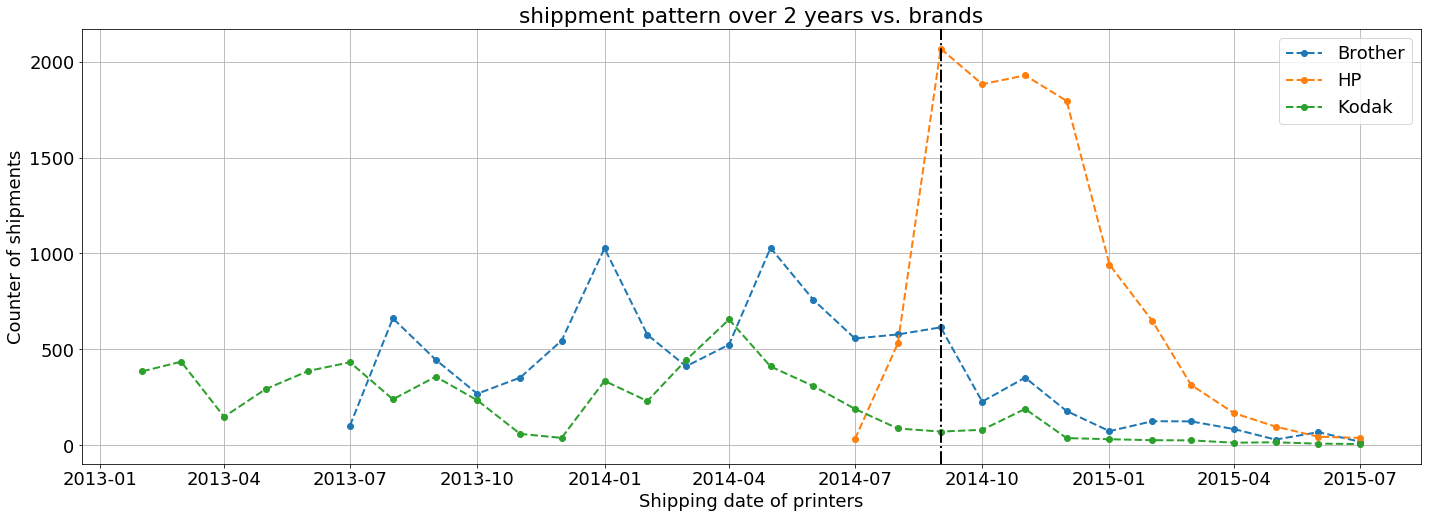

In [39]:
plt.figure(figsize=(24,8))
plt.plot_date(df_agg_ship_date[df_agg_ship_date['Brand'] == 'Brother']['Date'], df_agg_ship_date[df_agg_ship_date['Brand'] == 'Brother']['shipping_counts'], linestyle='--', label='Brother')
plt.plot_date(df_agg_ship_date[df_agg_ship_date['Brand'] == 'HP']['Date'], df_agg_ship_date[df_agg_ship_date['Brand'] == 'HP']['shipping_counts'],  linestyle='--',label='HP')
plt.plot_date(df_agg_ship_date[df_agg_ship_date['Brand'] == 'Kodak']['Date'], df_agg_ship_date[df_agg_ship_date['Brand'] == 'Kodak']['shipping_counts'],  linestyle='--',label='Kodak')
plt.legend()
plt.xlabel('Shipping date of printers')
plt.ylabel('Counter of shipments')
plt.title('shippment pattern over 2 years vs. brands')
plt.grid()
plt.axvline('2014-09-01', linestyle='-.', color='black')

## Failure tracking (count and time) last time stamp used as indicator
### Vertical dash line shows pick of fail (~5 months after peak of shipment)

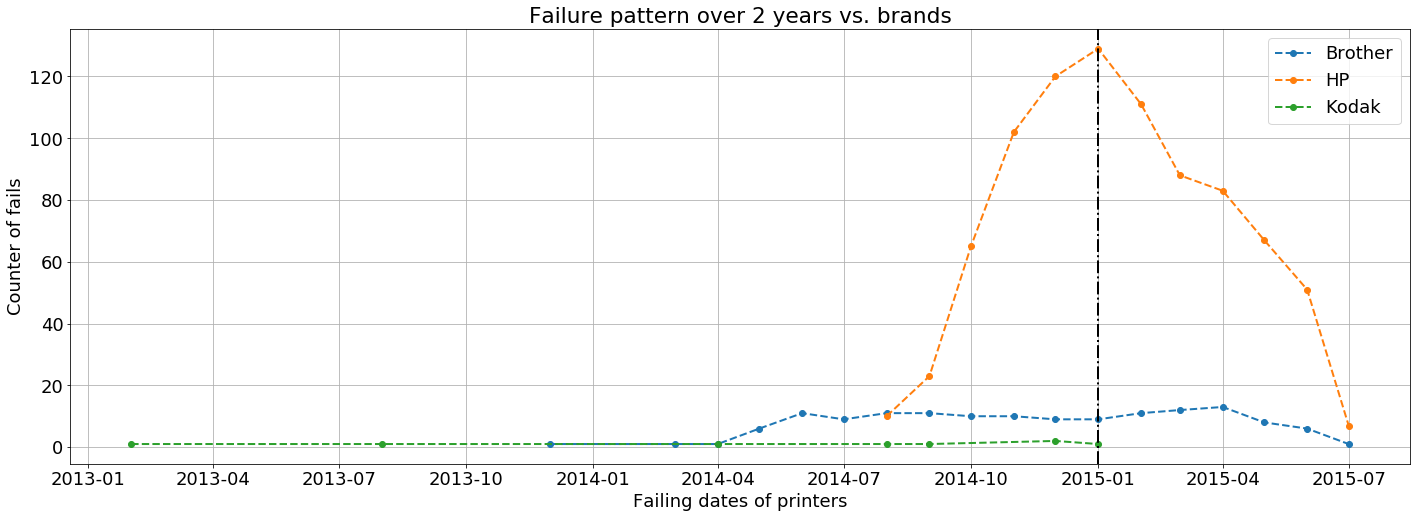

In [40]:
plt.figure(figsize=(24,8))
plt.plot_date(df_agg_fail_date[df_agg_fail_date['Brand'] == 'Brother']['Date'], df_agg_fail_date[df_agg_fail_date['Brand'] == 'Brother']['fail_counts'], linestyle='--', label='Brother')
plt.plot_date(df_agg_fail_date[df_agg_fail_date['Brand'] == 'HP']['Date'], df_agg_fail_date[df_agg_fail_date['Brand'] == 'HP']['fail_counts'],  linestyle='--',label='HP')
plt.plot_date(df_agg_fail_date[df_agg_fail_date['Brand'] == 'Kodak']['Date'], df_agg_fail_date[df_agg_fail_date['Brand'] == 'Kodak']['fail_counts'],  linestyle='--',label='Kodak')
plt.legend()
plt.xlabel('Failing dates of printers')
plt.ylabel('Counter of fails')
plt.title('Failure pattern over 2 years vs. brands')
plt.grid()
plt.axvline('2015-01-01', linestyle='-.', color='black')

In [41]:
df_damaged_6month_cut = df_damaged[df_damaged['date_time_last'] <= '2015-01-01'].copy()

In [42]:
df_damaged_6month_cut_agg = df_damaged_6month_cut.groupby(by=['date_time_last']).count().reset_index()[['date_time_last', 'office_id']].rename(columns = {'office_id': 'fail_counts'})

In [43]:
dates = pd.date_range('2013-02-01', '2015-01-01', freq='MS')

In [44]:
all_dates = pd.DataFrame(index=dates)
all_dates = all_dates.reset_index().rename(columns = {'index': 'Date'})

In [45]:
df_damaged_6month_cut_agg_all = pd.merge(all_dates, df_damaged_6month_cut_agg, how='left', left_on='Date', right_on='date_time_last')

In [46]:
df_damaged_6month_cut_agg_all.fillna(0.01, inplace=True) # divide by zero

In [47]:
df_damaged_6month_cut_agg_all

,Date,date_time_last,fail_counts
0,2013-02-01,2013-02-01 00:00:00,1.00
1,2013-03-01,0.01,0.01
2,2013-04-01,0.01,0.01
3,2013-05-01,0.01,0.01
4,2013-06-01,0.01,0.01
5,2013-07-01,0.01,0.01
6,2013-08-01,2013-08-01 00:00:00,1.00
7,2013-09-01,0.01,0.01
8,2013-10-01,0.01,0.01
9,2013-11-01,0.01,0.01


## Failure count for all brand vs. last time stamp up the time when the shipment is reduced

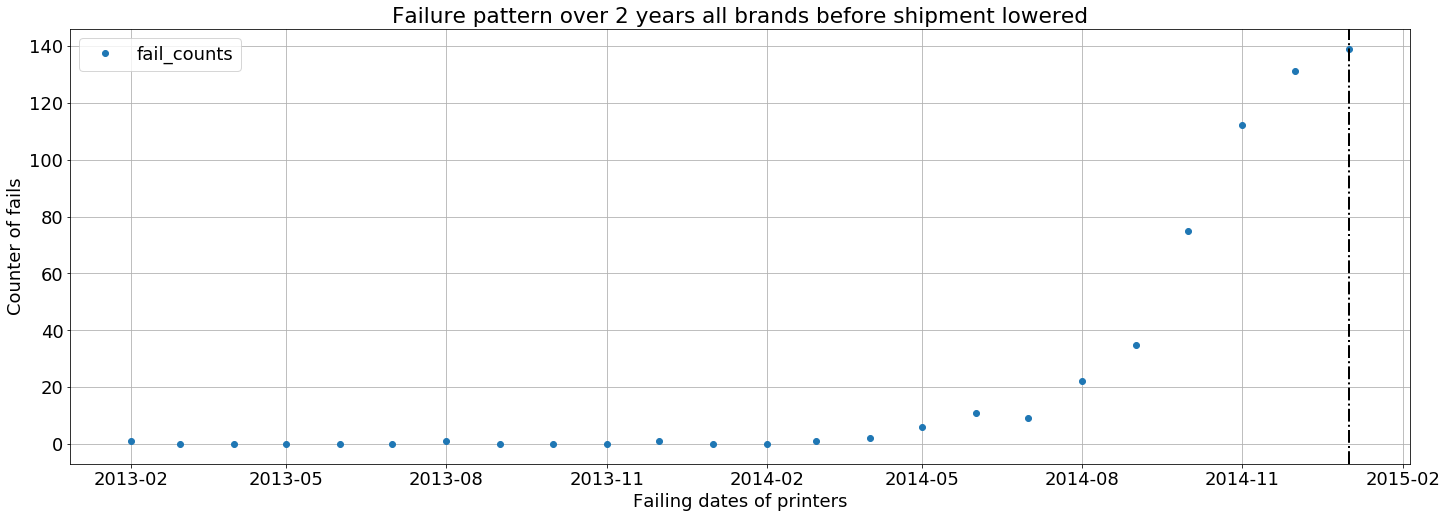

In [48]:
plt.figure(figsize=(24,8))
plt.plot_date(df_damaged_6month_cut_agg_all['Date'], df_damaged_6month_cut_agg_all['fail_counts'])
plt.legend()
plt.xlabel('Failing dates of printers')
plt.ylabel('Counter of fails')
plt.title('Failure pattern over 2 years all brands before shipment lowered')
plt.grid()
plt.axvline('2015-01-01', linestyle='-.', color='black')

In [49]:
train = df_damaged_6month_cut_agg_all[['Date', 'fail_counts']].iloc[0:21]
test = df_damaged_6month_cut_agg_all[['Date', 'fail_counts']].iloc[20:]

In [50]:
train.index = train['Date']
test.index = test['Date']

In [51]:
train

,Date,fail_counts
Date,,
2013-02-01,2013-02-01,1.00
2013-03-01,2013-03-01,0.01
2013-04-01,2013-04-01,0.01
2013-05-01,2013-05-01,0.01
2013-06-01,2013-06-01,0.01
2013-07-01,2013-07-01,0.01
2013-08-01,2013-08-01,1.00
2013-09-01,2013-09-01,0.01
2013-10-01,2013-10-01,0.01


## Extracting seasonality and trend (no seasonality is observed)
### There could be a seasonality if the week by week data and more sample size was available

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


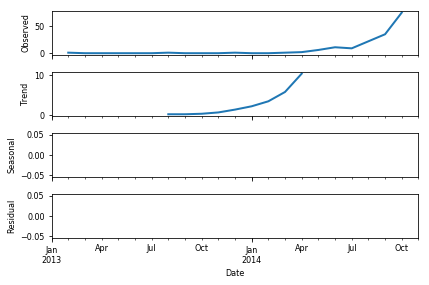

In [112]:
#train = train.drop(columns=['Date'])
plt.rcParams.update({'font.size': 8, 'lines.linewidth': 2.0})
sm.tsa.seasonal_decompose(train.fail_counts).plot()
result = sm.tsa.stattools.adfuller(train.fail_counts)
plt.show()

In [113]:
test = test.drop(columns=['Date'])
test

,fail_counts
Date,
2014-10-01,75.0
2014-11-01,112.0
2014-12-01,131.0
2015-01-01,139.0


In [114]:
y_predict = test.copy()
fit_holt_linear = Holt(np.asarray(train['fail_counts']), exponential=False).fit(smoothing_level = 0.6)

In [115]:
y_predict['Holt_linear'] = fit_holt_linear.forecast(len(test))

In [116]:
y_predict

,fail_counts,Holt_linear
Date,,
2014-10-01,75.0,83.177364
2014-11-01,112.0,105.302788
2014-12-01,131.0,127.428211
2015-01-01,139.0,149.553634


## Holt Linear model
## Only a period before shipment reduction is considered
## Method is not able to predict the drop after ward, due limited data on such behavior in the past as well as the event is sudden external influence and no pattern to it

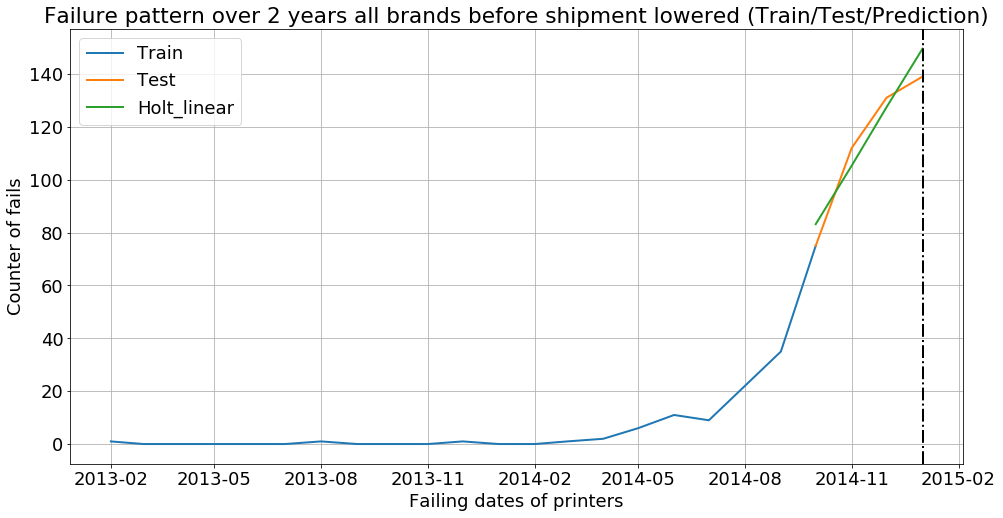

In [119]:
plt.rcParams.update({'font.size': 18, 'lines.linewidth': 2.0})
plt.figure(figsize=(16,8))
plt.plot(train['fail_counts'], label='Train')
plt.plot(test['fail_counts'], label='Test')
plt.plot(y_predict['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.xlabel('Failing dates of printers')
plt.ylabel('Counter of fails')
plt.title('Failure pattern over 2 years all brands before shipment lowered (Train/Test/Prediction)')
plt.grid()
plt.axvline('2015-01-01', linestyle='-.', color='black')
plt.show()

## Check seiral number of fails vs. pass if a pattern emerges
### No difference in decoded letter distribution was observed


In [120]:
from collections import Counter
def serial_decode_fail_pass(brand):
    fail_serial = list(df[(df['Brand'] == str(brand)) & (df['damaged'] == True)]['serial'].values)
    pass_serial = list(df[(df['Brand'] == str(brand)) & (df['damaged'] == False)]['serial'].values)
    fail_serial_1st_letter = np.array(list(map(lambda x:x[0], fail_serial)))
    pass_serial_1st_letter = np.array(list(map(lambda x:x[0], pass_serial)))
    
    counter_fail = Counter()
    for letter in fail_serial_1st_letter:
        counter_fail[letter] += 1
    counter_pass = Counter()
    for letter in pass_serial_1st_letter:
        counter_pass[letter] += 1
   
    print('{} serial first letters, fail and pass'.format(str(brand)))
    print('Fails 1st letter percent%: {} \nPass 1st letter %percent: {}'.format(counter_fail, counter_pass))
    print('')


In [121]:
serial_decode_fail_pass('HP')
serial_decode_fail_pass('Brother')
serial_decode_fail_pass('Kodak')

HP serial first letters, fail and pass
Fails 1st letter percent%: Counter({'X': 263, 'S': 233, 'H': 210, 'E': 150}) 
Pass 1st letter %percent: Counter({'H': 2729, 'S': 2705, 'X': 2389, 'E': 1812})

Brother serial first letters, fail and pass
Fails 1st letter percent%: Counter({'B': 81, 'F': 37, 'T': 13, 'L': 9}) 
Pass 1st letter %percent: Counter({'T': 3277, 'B': 2937, 'L': 1803, 'F': 1587})

Kodak serial first letters, fail and pass
Fails 1st letter percent%: Counter({'K': 7, 'Y': 1}) 
Pass 1st letter %percent: Counter({'K': 3194, 'Y': 3055})



## Study the impact of fails over time 

In [122]:
df_brother_fixtime = df[(df['Brand'] == 'Brother') & (df['date_time_first']>='2014-01-01')\
                        & (df['date_time_first']<='2014-05-01')][['damaged', 'serial', 'delta_time_month_int']].copy()
df_kodak_fixtime = df[(df['Brand'] == 'Kodak') & (df['date_time_first']>='2013-07-01')\
                      & (df['date_time_first']<='2014-05-01')][['damaged', 'serial', 'delta_time_month_int']].copy()
df_hp_fixtime = df[(df['Brand'] == 'HP') & (df['date_time_first']>='2014-09-01')\
                   & (df['date_time_first']<='2014-12-01')][['damaged', 'serial', 'delta_time_month_int']].copy()


In [123]:
df_brother_tot_count_fixtime = df_brother_fixtime.shape[0]
df_kodak_tot_count_fixtime = df_kodak_fixtime.shape[0]
df_hp_tot_count_fixtime = df_hp_fixtime.shape[0]

df_hp_tot_count_fixtime

7672

In [124]:
df_hp_fixtime_group_fail = df_hp_fixtime.groupby(by='delta_time_month_int').sum().reset_index()
df_brother_fixtime_group_fail = df_brother_fixtime.groupby(by='delta_time_month_int').sum().reset_index()
df_kodak_fixtime_group_fail = df_kodak_fixtime.groupby(by='delta_time_month_int').sum().reset_index()

In [125]:
df_hp_fixtime_group_fail['percent_fail'] = df_hp_fixtime_group_fail['damaged'] / df_hp_tot_count_fixtime
df_brother_fixtime_group_fail['percent_fail'] = df_brother_fixtime_group_fail['damaged'] / df_brother_tot_count_fixtime
df_kodak_fixtime_group_fail['percent_fail'] = df_kodak_fixtime_group_fail['damaged'] / df_kodak_tot_count_fixtime

df_hp_fixtime_group_fail['count_fail_1000'] = (df_hp_fixtime_group_fail['percent_fail'] * 1000).astype('int64')
df_brother_fixtime_group_fail['count_fail_1000'] = (df_brother_fixtime_group_fail['percent_fail'] * 1000).astype('int64')
df_kodak_fixtime_group_fail['count_fail_1000'] = (df_kodak_fixtime_group_fail['percent_fail'] * 1000).astype('int64')

In [126]:
df_hp_fixtime_group_fail

,delta_time_month_int,damaged,percent_fail,count_fail_1000
0,0,122.0,0.015902,15
1,1,132.0,0.017205,17
2,2,97.0,0.012643,12
3,3,65.0,0.008472,8
4,4,67.0,0.008733,8
5,5,44.0,0.005735,5
6,6,40.0,0.005214,5
7,7,26.0,0.003389,3
8,8,22.0,0.002868,2
9,9,8.0,0.001043,1


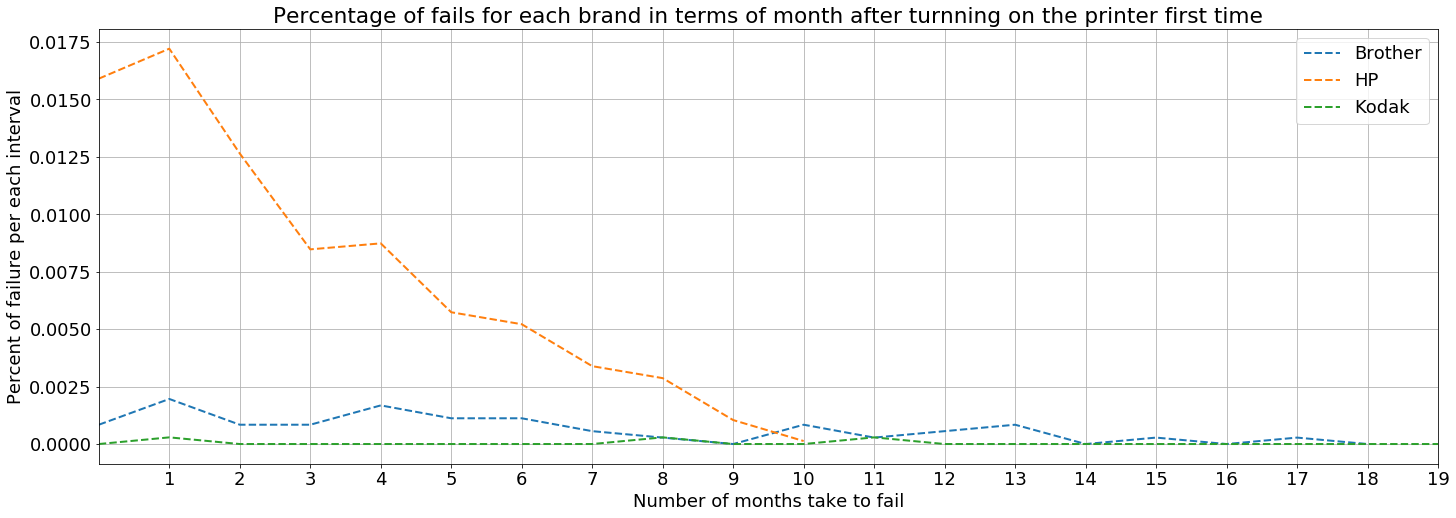

In [127]:
plt.figure(figsize=(24,8))
plt.plot(df_brother_fixtime_group_fail['delta_time_month_int'], df_brother_fixtime_group_fail['percent_fail'], linestyle='--', label='Brother')
plt.plot(df_hp_fixtime_group_fail['delta_time_month_int'], df_hp_fixtime_group_fail['percent_fail'],  linestyle='--',label='HP')
plt.plot(df_kodak_fixtime_group_fail['delta_time_month_int'], df_kodak_fixtime_group_fail['percent_fail'],  linestyle='--',label='Kodak')
plt.legend()
plt.xticks(np.arange(1, 20, 1))
plt.xlim([0, 19])
plt.xlabel('Number of months take to fail')
plt.ylabel('Percent of failure per each interval')
plt.title('Percentage of fails for each brand in terms of month after turnning on the printer first time')
plt.grid()

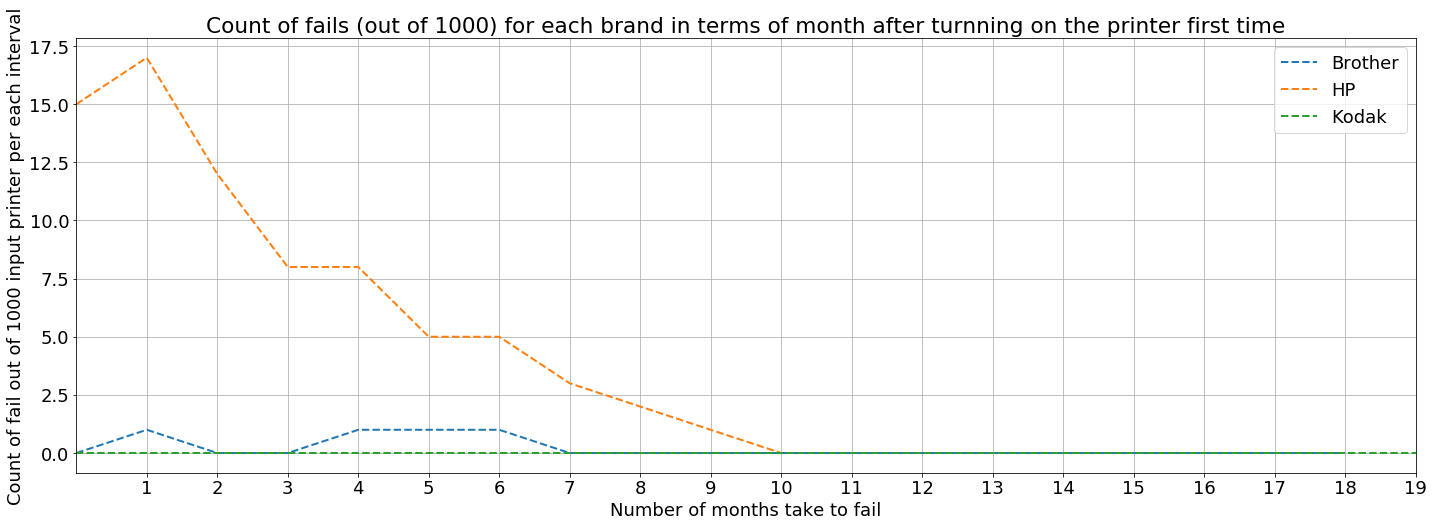

In [128]:
plt.figure(figsize=(24,8))
plt.plot(df_brother_fixtime_group_fail['delta_time_month_int'], df_brother_fixtime_group_fail['count_fail_1000'], linestyle='--', label='Brother')
plt.plot(df_hp_fixtime_group_fail['delta_time_month_int'], df_hp_fixtime_group_fail['count_fail_1000'],  linestyle='--',label='HP')
plt.plot(df_kodak_fixtime_group_fail['delta_time_month_int'], df_kodak_fixtime_group_fail['count_fail_1000'],  linestyle='--',label='Kodak')
plt.legend()
plt.xticks(np.arange(1, 20, 1))
plt.xlim([0, 19])
plt.xlabel('Number of months take to fail')
plt.ylabel('Count of fail out of 1000 input printer per each interval')
plt.title('Count of fails (out of 1000) for each brand in terms of month after turnning on the printer first time')
plt.grid()

## Prediction Modeling

In [52]:
df_model = df[['total_activity', 'Brand', 'office_average_monthly_activity',\
               'damaged', 'date_time_first', 'delta_time_month_int']].copy()

In [53]:
df_model.head()

,total_activity,Brand,office_average_monthly_activity,damaged,date_time_first,delta_time_month_int
0,2161,HP,756.36,False,2014-09-01,10
1,888,HP,756.36,True,2014-08-01,6
2,14385,Kodak,1776.62,False,2014-01-01,15
3,9508,Kodak,1776.62,False,2014-01-01,14
4,414,Brother,473.70,False,2014-01-01,13


In [54]:
df_model['year'] = df_model['date_time_first'].dt.year
df_model['month'] = df_model['date_time_first'].dt.month

In [55]:
df_model.head()

,total_activity,Brand,office_average_monthly_activity,damaged,date_time_first,delta_time_month_int,year,month
0,2161,HP,756.36,False,2014-09-01,10,2014,9
1,888,HP,756.36,True,2014-08-01,6,2014,8
2,14385,Kodak,1776.62,False,2014-01-01,15,2014,1
3,9508,Kodak,1776.62,False,2014-01-01,14,2014,1
4,414,Brother,473.70,False,2014-01-01,13,2014,1


In [56]:
df_model['month'] = df_model['month'].astype('category', copy=True)
df_model['year'] = df_model['year'].astype('category', copy=True)

In [57]:
fail_map = {False: 0, True: 1}

In [58]:
df_model['Fail'] = df['damaged'].map(fail_map)

In [59]:
df_model.head()

,total_activity,Brand,office_average_monthly_activity,damaged,date_time_first,delta_time_month_int,year,month,Fail
0,2161,HP,756.36,False,2014-09-01,10,2014,9,0
1,888,HP,756.36,True,2014-08-01,6,2014,8,1
2,14385,Kodak,1776.62,False,2014-01-01,15,2014,1,0
3,9508,Kodak,1776.62,False,2014-01-01,14,2014,1,0
4,414,Brother,473.70,False,2014-01-01,13,2014,1,0


In [73]:
X = df_model.drop(['Fail', 'damaged', 'date_time_first'], axis=1)
y = df_model['Fail'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
X_train.head()

,total_activity,Brand,office_average_monthly_activity,delta_time_month_int,year,month
17914,14,HP,2.180,10,2014,9
21907,76,HP,126.215,1,2015,4
2078,430,Kodak,362.735,8,2013,3
12513,1046,Brother,71.200,14,2014,5
8468,68,Brother,6.040,11,2014,1


## ADA Boost

In [114]:
categorical_col = ['Brand', 'year', 'month']
numerical_col = ['total_activity', 'office_average_monthly_activity', 'delta_time_month_int']

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_col),
        ('cat', categorical_transformer, categorical_col)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', AdaBoostClassifier(n_estimators=500))])


In [115]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=None))])

In [131]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

print("Train\n------")
print("Accuracy score on train data: {:.4f}".format(accuracy_score(y_train, y_train_predict)))
print("F-score on train data: {:.4f}".format(f1_score(y_train, y_train_predict)))
print("Recall on train data: {:.4f}".format(recall_score(y_train, y_train_predict)))
print("Precision on train data: {:.4f}".format(precision_score(y_train, y_train_predict)))
print("Confusion matrix\n", confusion_matrix(y_train, y_train_predict))
print("\n\nTest\n------")
print("Accuracy score on test data: {:.4f}".format(accuracy_score(y_test, y_test_predict)))
print("F-score on test data: {:.4f}".format(f1_score(y_test, y_test_predict)))
print("Recall on test data: {:.4f}".format(recall_score(y_test, y_test_predict)))
print("Precision on test data: {:.4f}".format(precision_score(y_test, y_test_predict)))
print("Confusion matrix\n", confusion_matrix(y_test, y_test_predict))

Train
------
Accuracy score on train data: 0.9621
F-score on train data: 0.3290
Recall on train data: 0.2388
Precision on train data: 0.5288
Confusion matrix
 [[16911   147]
 [  526   165]]


Test
------
Accuracy score on test data: 0.9621
F-score on test data: 0.2595
Recall on test data: 0.1853
Precision on test data: 0.4328
Confusion matrix
 [[8354   76]
 [ 255   58]]


## Gradient Boost

In [133]:
categorical_col = ['Brand', 'year', 'month']
numerical_col = ['total_activity', 'office_average_monthly_activity', 'delta_time_month_int']

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_col),
        ('cat', categorical_transformer, categorical_col)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(n_estimators=500))])


In [134]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [135]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

print("Train\n------")
print("Accuracy score on train data: {:.4f}".format(accuracy_score(y_train, y_train_predict)))
print("F-score on train data: {:.4f}".format(f1_score(y_train, y_train_predict)))
print("Recall on train data: {:.4f}".format(recall_score(y_train, y_train_predict)))
print("Precision on train data: {:.4f}".format(precision_score(y_train, y_train_predict)))
print("Confusion matrix\n", confusion_matrix(y_train, y_train_predict))
print("\n\nTest\n------")
print("Accuracy score on test data: {:.4f}".format(accuracy_score(y_test, y_test_predict)))
print("F-score on test data: {:.4f}".format(f1_score(y_test, y_test_predict)))
print("Recall on test data: {:.4f}".format(recall_score(y_test, y_test_predict)))
print("Precision on test data: {:.4f}".format(precision_score(y_test, y_test_predict)))
print("Confusion matrix\n", confusion_matrix(y_test, y_test_predict))

Train
------
Accuracy score on train data: 0.9797
F-score on train data: 0.6774
Recall on train data: 0.5485
Precision on train data: 0.8855
Confusion matrix
 [[17009    49]
 [  312   379]]


Test
------
Accuracy score on test data: 0.9628
F-score on test data: 0.3487
Recall on test data: 0.2780
Precision on test data: 0.4677
Confusion matrix
 [[8331   99]
 [ 226   87]]


## Random Forest

In [136]:
categorical_col = ['Brand', 'year', 'month']
numerical_col = ['total_activity', 'office_average_monthly_activity', 'delta_time_month_int']

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_col),
        ('cat', categorical_transformer, categorical_col)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=500))])

In [137]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [138]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

print("Train\n------")
print("Accuracy score on train data: {:.4f}".format(accuracy_score(y_train, y_train_predict)))
print("F-score on train data: {:.4f}".format(f1_score(y_train, y_train_predict)))
print("Recall on train data: {:.4f}".format(recall_score(y_train, y_train_predict)))
print("Precision on train data: {:.4f}".format(precision_score(y_train, y_train_predict)))
print("Confusion matrix\n", confusion_matrix(y_train, y_train_predict))
print("\n\nTest\n------")
print("Accuracy score on test data: {:.4f}".format(accuracy_score(y_test, y_test_predict)))
print("F-score on test data: {:.4f}".format(f1_score(y_test, y_test_predict)))
print("Recall on test data: {:.4f}".format(recall_score(y_test, y_test_predict)))
print("Precision on test data: {:.4f}".format(precision_score(y_test, y_test_predict)))
print("Confusion matrix\n", confusion_matrix(y_test, y_test_predict))

Train
------
Accuracy score on train data: 0.9999
F-score on train data: 0.9993
Recall on train data: 0.9986
Precision on train data: 1.0000
Confusion matrix
 [[17058     0]
 [    1   690]]


Test
------
Accuracy score on test data: 0.9609
F-score on test data: 0.3187
Recall on test data: 0.2556
Precision on test data: 0.4233
Confusion matrix
 [[8321  109]
 [ 233   80]]
